<a href="https://colab.research.google.com/github/rahulbaburaj1/Stock-Price-Prediction-using-LSTM/blob/main/AppleStockPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas_datareader as pdr
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [57]:
df = pdr.get_data_tiingo('AAPL',api_key='5bfa3b5917fe03b757e4278b0a66a3b1f5e9aafb')

<ipython-input-57-da8c1121d949>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL',api_key='5bfa3b5917fe03b757e4278b0a66a3b1f5e9aafb')


In [58]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-08-01 00:00:00+00:00  201.50  201.76  197.31  199.13  67935716   
       2018-08-02 00:00:00+00:00  207.39  208.38  200.35  200.58  62404012   
       2018-08-03 00:00:00+00:00  207.99  208.74  205.48  207.03  33447396   
       2018-08-06 00:00:00+00:00  209.07  209.25  207.07  208.00  25425387   
       2018-08-07 00:00:00+00:00  207.11  209.50  206.76  209.32  25587387   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-08-01 00:00:00+00:00  48.138087  48.200200  47.137101  47.571897   
       2018-08-02 00:00:00+00:00  49.545200  49.781710  47.863353  47.918300   
       2018-08-03 00:00:00+00:00  49.688539  49.867713  49.088903  49.459196   
       2018-08-06 00:00:00+00:00  49.946550  49.989551  49.468752  49.690928   
       2018-08-07 00:00:00+00:00  49.478308  50.049276  49.394694  50.006274   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-08-01 00:00:00+00:00  271742864      0.0          1.0  
       2018-08-02 00:00:00+00:00  249616048      0.0          1.0  
       2018-08-03 00:00:00+00:00  133789584      0.0          1.0  
       2018-08-06 00:00:00+00:00  101701548      0.0          1.0  
       2018-08-07 00:00:00+00:00  102349548      0.0          1.0

In [59]:
df.to_csv('AAPL.csv')

In [60]:
import pandas as pd
apple = pd.read_csv('AAPL.csv')
apple.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-08-01 00:00:00+00:00,201.50,201.76,197.31,199.13,67935716,48.138087,48.200200,47.137101,47.571897,271742864,0.0,1.0
1,AAPL,2018-08-02 00:00:00+00:00,207.39,208.38,200.35,200.58,62404012,49.545200,49.781710,47.863353,47.918300,249616048,0.0,1.0
2,AAPL,2018-08-03 00:00:00+00:00,207.99,208.74,205.48,207.03,33447396,49.688539,49.867713,49.088903,49.459196,133789584,0.0,1.0
3,AAPL,2018-08-06 00:00:00+00:00,209.07,209.25,207.07,208.00,25425387,49.946550,49.989551,49.468752,49.690928,101701548,0.0,1.0
4,AAPL,2018-08-07 00:00:00+00:00,207.11,209.50,206.76,209.32,25587387,49.478308,50.049276,49.394694,50.006274,102349548,0.0,1.0


In [61]:
apple.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-07-24 00:00:00+00:00,192.75,194.910,192.250,193.41,45505097,192.75,194.910,192.250,193.41,45505097,0.0,1.0
1252,AAPL,2023-07-25 00:00:00+00:00,193.62,194.440,192.915,193.33,37283201,193.62,194.440,192.915,193.33,37283201,0.0,1.0
1253,AAPL,2023-07-26 00:00:00+00:00,194.50,195.640,193.320,193.67,47471868,194.50,195.640,193.320,193.67,47471868,0.0,1.0
1254,AAPL,2023-07-27 00:00:00+00:00,193.22,197.200,192.550,196.02,47460180,193.22,197.200,192.550,196.02,47460180,0.0,1.0
1255,AAPL,2023-07-28 00:00:00+00:00,195.83,196.626,194.140,194.67,48291443,195.83,196.626,194.140,194.67,48291443,0.0,1.0


In [62]:
df2 = apple.reset_index()['close']#change index to close

In [63]:
df2.shape

(1256,)

In [64]:
df2.isnull().sum()

0

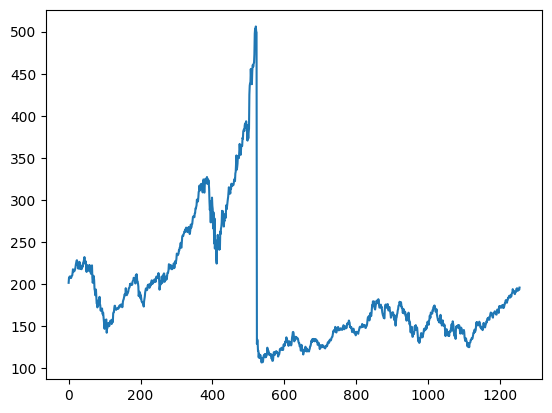

In [65]:
plt.plot(df2)

In [66]:
df2

0       201.50
1       207.39
2       207.99
3       209.07
4       207.11
         ...  
1251    192.75
1252    193.62
1253    194.50
1254    193.22
1255    195.83
Name: close, Length: 1256, dtype: float64

Scaling Using MinMax Scalar()
LSTM are Sensitive to scale of the data

In [67]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))#Scale in range of [0-1]
df2 = sc.fit_transform(np.array(df2).reshape(-1,1))

In [68]:
df2

array([[0.23709455],
       [0.25184721],
       [0.25335003],
       ...,
       [0.21956168],
       [0.21635567],
       [0.22289292]])

Train Test Splitting

In [69]:
tr_size = int(len(df2)*0.70)
te_size = len(df2) - tr_size
x,y = df2[0:tr_size,:],df2[tr_size:len(df2),:1]

In [70]:
import numpy
def cr_dataset(dataset , time_step = 1):
  dataX , dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return numpy.array(dataX),numpy.array(dataY)

In [71]:
time_step = 100
x_train,y_train = cr_dataset(x,time_step)
x_test,y_test  = cr_dataset(y,time_step)

In [72]:
x_train#per record contains 100 record

array([[0.23709455, 0.25184721, 0.25335003, ..., 0.13537884, 0.12520977,
        0.10993112],
       [0.25184721, 0.25335003, 0.2560551 , ..., 0.12520977, 0.10993112,
        0.10016281],
       [0.25335003, 0.2560551 , 0.2511459 , ..., 0.10993112, 0.10016281,
        0.12606137],
       ...,
       [0.11591735, 0.11268629, 0.11438948, ..., 0.15769568, 0.14875391,
        0.14444584],
       [0.11268629, 0.11438948, 0.11724483, ..., 0.14875391, 0.14444584,
        0.13918597],
       [0.11438948, 0.11724483, 0.11887289, ..., 0.14444584, 0.13918597,
        0.13720726]])

Reshape input features for LSTM

In [73]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [75]:
model = Sequential()
model.add(LSTM(50,return_sequences= True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=100,verbose = 1)

Epoch 1/100
13/13 [==============================] - 15s 377ms/step - loss: 0.5914 - accuracy: 0.0013 - val_loss: 0.4186 - val_accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 3s 201ms/step - loss: 0.4849 - accuracy: 0.0013 - val_loss: 0.3791 - val_accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 3s 203ms/step - loss: 0.4710 - accuracy: 0.0026 - val_loss: 0.3769 - val_accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 3s 244ms/step - loss: 0.4638 - accuracy: 0.0026 - val_loss: 0.3780 - val_accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 3s 232ms/step - loss: 0.4585 - accuracy: 0.0026 - val_loss: 0.3738 - val_accuracy: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 3s 196ms/step - loss: 0.4552 - accuracy: 0.0026 - val_loss: 0.3734 - val_accuracy: 0.0000e+00
Epoch 7/100
13/13 [==============================] - 3s 203ms/step - loss: 0.4531 - accuracy: 0.0026 - val_loss: 0.37

In [82]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

9/9 [==============================] - 0s 40ms/step


In [83]:
train_predict = sc.inverse_transform(train_predict)
test_predict =  sc.inverse_transform(test_predict)

Root Mean Square Evaluation

In [84]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

209.70805249615805

In [85]:
math.sqrt(mean_squared_error(y_test,test_predict))

157.92974702401284